In [1]:
from protein import Protein
from forcefield import FF
from rotamere import RotamereLib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RotamereLib()

In [3]:
s = Protein('sample.pdb')
print(s)
print(f'First residue: {s.res_indices[0]}')

Protein(94 residues, 783 atoms)
First residue: 1


In [4]:
ff = FF()
ff.lj

{'ALA-N': (1.42, 0.08),
 'ALA-CA': (1.78, 0.25),
 'ALA-CB': (1.96, 0.48),
 'ALA-C': (1.4, 0.14),
 'ALA-O': (1.48, 0.22),
 'ARG-N': (1.42, 0.08),
 'ARG-CA': (1.78, 0.25),
 'ARG-CB': (1.91, 0.37),
 'ARG-CG': (1.91, 0.37),
 'ARG-CD': (1.91, 0.37),
 'ARG-NE': (1.69, 0.24),
 'ARG-CZ': (1.43, 0.07),
 'ARG-NH1': (1.69, 0.24),
 'ARG-NH2': (1.69, 0.24),
 'ARG-C': (1.4, 0.14),
 'ARG-O': (1.48, 0.22),
 'ASP-N': (1.42, 0.08),
 'ASP-CA': (1.78, 0.25),
 'ASP-CB': (1.91, 0.37),
 'ASP-CG': (1.43, 0.07),
 'ASP-OD1': (1.4, 0.07),
 'ASP-OD2': (1.4, 0.07),
 'ASP-C': (1.4, 0.14),
 'ASP-O': (1.48, 0.22)}

In [5]:
ff.eval_prot(s)

(-0.25, 1.5)

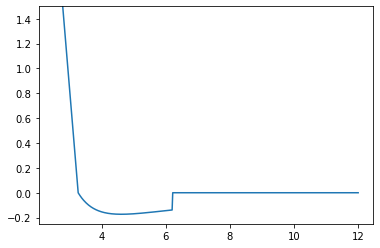

In [6]:
import energy
import math

def temp(sig_i, eps_i, sig_j, eps_j, r):
    sig_ij = sig_i + sig_j
    eps_ij = math.sqrt(eps_i * eps_j)
    r_star = r / sig_ij
    
    if 1.9 > r_star >= 1:
        r_6 = (1/r)**2
        return eps_ij * (r_6**2 - r_6)
    else:
        return 0

r = np.linspace(2.5, 12.0, 500)
vdw = np.vectorize(energy.faspr_vdw)

# U = vdw(1.96, 0.48, 1.96, 0.48, r)
U = []
for x in r:
    U.append(energy.faspr_vdw(1.96, 0.48, 1.30, 1.00, x))

plt.plot(r, U)
plt.ylim(-0.25, 1.5)


In [7]:
ff.calc_energy(s)

16.63658373462491